 # Описание проекта
 
   Первое задание: помочь маркетологам снизить расходы — отказаться от невыгодных источников трафика и перераспределить бюджет.
Есть данные Яндекс.Афиши с июня 2017 по конец мая 2018 года:
лог сервера с данными о посещениях сайта Яндекс.Афиши,
выгрузка всех заказов за этот период,
статистика рекламных расходов.

Необходимо изучить:
- как клиенты пользуются сервисом,
- когда делают первые покупки на сайте,
- сколько денег приносит компании каждый клиент,
- когда расходы на привлечение клиента окупаются.

Выручка измеряется в условных единицах — у.е. 

## Загрузка данных

In [1]:
import pandas as pd
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
visits_log = pd.read_csv('/datasets/visits_log.csv')
orders_log = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

In [3]:
#Создадим словарь соответствия фрейма и его имени
dictionary_with_frames ={
    'visits_log': visits_log,
    'orders_log': orders_log, 
    'costs': costs
}

### Проверка на наличие дубликатов, пропусков. Вывод формата данных в столбцах, структуры таблицы и наименование столбцов

In [4]:

dictionary_with_frames_col = ['visits_log','orders_log','costs']
for row in dictionary_with_frames_col:
    print('Таблица: ',row)
    print('Количество дубликатов: ',dictionary_with_frames[row].duplicated().sum())
    print('')
    dictionary_with_frames[row].info()
    print('')
    display('Количество пропусков:',dictionary_with_frames[row].isna().sum())
    display(dictionary_with_frames[row].head(5))
    print('_____________________________________________________________________________________________________')

Таблица:  visits_log
Количество дубликатов:  0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB



'Количество пропусков:'

Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


_____________________________________________________________________________________________________
Таблица:  orders_log
Количество дубликатов:  0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB



'Количество пропусков:'

Buy Ts     0
Revenue    0
Uid        0
dtype: int64

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


_____________________________________________________________________________________________________
Таблица:  costs
Количество дубликатов:  0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB



'Количество пропусков:'

source_id    0
dt           0
costs        0
dtype: int64

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


_____________________________________________________________________________________________________


Вывод: во всех исходниках необходимо столбцы с датами преобразовать в тип datetime, привести наименование столбцов к нужному формату

In [5]:
visits_log.columns = ['device','end_ts','source_id','start_ts','uid']
orders_log.columns = ['buy_ts','revenue','uid']

In [6]:
visits_log['end_ts'] = pd.to_datetime(visits_log['end_ts'])
visits_log['start_ts'] = pd.to_datetime(visits_log['start_ts'])
orders_log['buy_ts'] = pd.to_datetime(orders_log['buy_ts'])
costs['dt'] = pd.to_datetime(costs['dt'])

In [7]:
visits_log.info()
print('')
orders_log.info()
print('')
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end_ts       359400 non-null datetime64[ns]
source_id    359400 non-null int64
start_ts     359400 non-null datetime64[ns]
uid          359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null datetime64[ns]
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


Вывод: данные проанализированы и преобразованы для дальнейшей работы

## Расчет метрик и построение графиков
### Расчет продуктовых метрик
DAU/WAU/MAU
- Cколько раз за день пользователи в среднем заходят на сайт?
- Cколько времени пользователи проводят на сайте?
- Рассчитать Retention Rate
- Средний Retention Rate на второй месяц «жизни» когорт

In [8]:
#Преобразуем даты и создадим столбцы с годом, месяцем, неделей и днем
visits_log['year'] = visits_log['start_ts'].dt.year
visits_log['month'] = visits_log['start_ts'].dt.month
visits_log['week'] = visits_log['start_ts'].dt.week
visits_log['date'] = visits_log['start_ts'].dt.date
visits_log['day_name'] = visits_log['start_ts'].dt.day_name()
visits_log['month_name'] = visits_log['start_ts'].dt.month_name()

In [9]:
# Расчет показателей DAU/WAU/MAU
dau = visits_log.groupby(['date']).agg({'uid':'nunique'}).mean()
wau = visits_log.groupby(['year','week']).agg({'uid':'nunique'}).mean()
mau = visits_log.groupby(['year','month']).agg({'uid':'nunique'}).mean()

In [10]:
# Количество унивкальных пользователей в день
"Количество уникальных пользователей в день (dau): {:.0f}".format(int(dau))

'Количество уникальных пользователей в день (dau): 907'

In [11]:
# Количество уникальных пользователей в неделю
"Количество уникальных пользователей в неделю (wau): {:.0f}".format(int(wau))

'Количество уникальных пользователей в неделю (wau): 5716'

In [12]:
# Количество уникальных пользователей в месяц
"Количество уникальных пользователей в месяц (mau): {:.0f}".format(int(mau))

'Количество уникальных пользователей в месяц (mau): 23228'

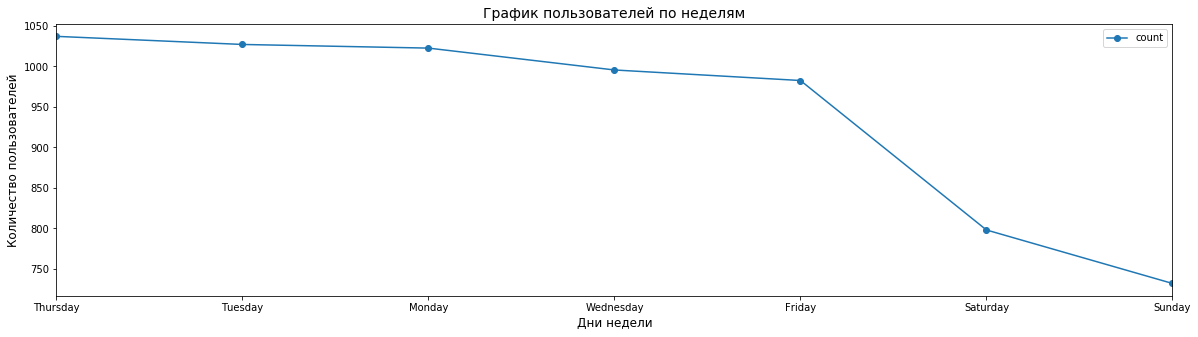

In [19]:
# График пользователей по неделям
plot_1_day=visits_log.groupby(['date', 'day_name']).agg({'uid':'nunique'}).reset_index()
plot_1_day.columns = ['date','day_name','count']
plot_1_day.pivot_table(index='day_name', values = 'count', aggfunc = 'median').sort_values(by='count', ascending = False).plot(style = '-o', y = 'count', figsize = (20,5))
plt.ylabel('Количество пользователей', fontsize=12)
plt.xlabel('Дни недели', fontsize=12)
plt.title('График пользователей по неделям', fontsize = 14)
plt.show()

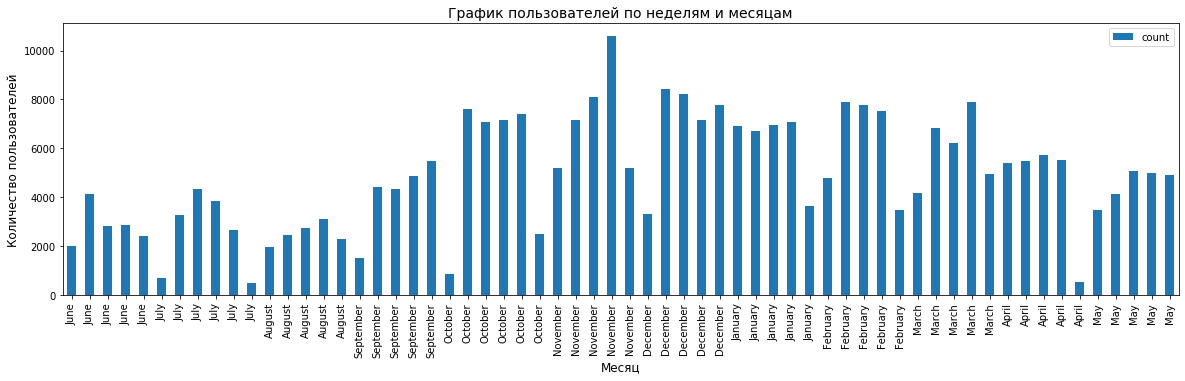

In [20]:
pivot_2_week = visits_log.groupby(['year','week','month', 'month_name']).agg({'uid':'nunique'}).reset_index().sort_values(by = ['year','month'],ascending = True)
pivot_2_week.columns = ['year','week','month', 'month_name', 'count']
pivot_2_week.plot(kind = 'bar', x = 'month_name', y ='count',figsize = (20,5))
plt.ylabel('Количество пользователей', fontsize=12)
plt.xlabel('Месяц', fontsize=12)
plt.title('График пользователей по неделям и месяцам', fontsize = 14)
plt.show()

Вывод: на графике можно заметить что первая и последняя неделя каждого месяца значительно менее активна. Основная активность на сайте начинается со 2 недели каждого месяца.

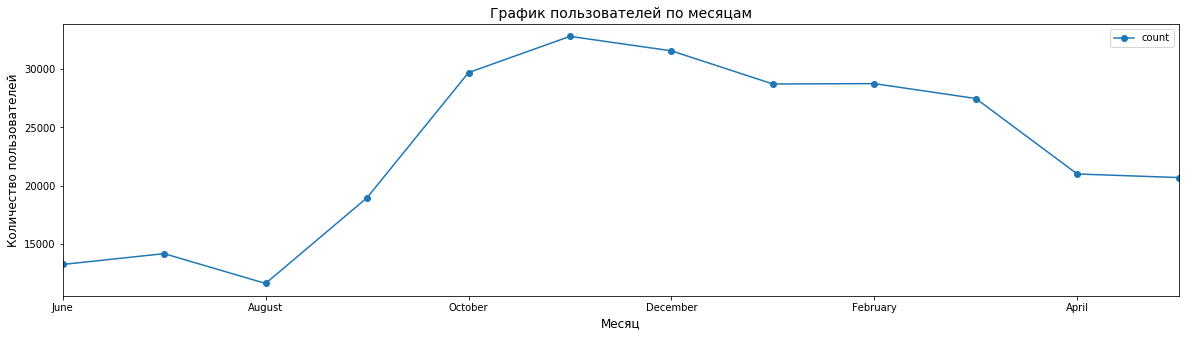

In [24]:
pivot_3_month = visits_log.groupby(['year','month','month_name']).agg({'uid':'nunique'}).reset_index().sort_values(by = ['year','month'],ascending = True)
pivot_3_month.columns = ['year','month','month_name', 'count']
pivot_3_month.plot(style = '-o',x = 'month_name', y = 'count', figsize = (20,5))
plt.ylabel('Количество пользователей', fontsize=12)
plt.xlabel('Месяц', fontsize=12)
plt.title('График пользователей по месяцам', fontsize = 14)
plt.show()

Вывод: Пик активности на сайте растет в зимний период и падает к летнему

Построим график DAU/WAU/MAU

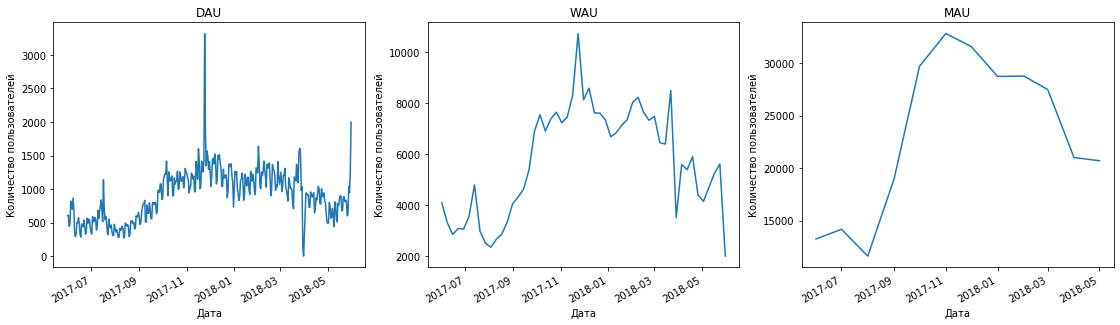

In [25]:
visits_log['session_month'] = visits_log['start_ts'].astype('datetime64[M]')
visits_log['session_week']  = visits_log['start_ts'].astype('datetime64[W]')

dau = visits_log.groupby('date').agg({'uid': 'nunique'})
wau = visits_log.groupby('session_week').agg({'uid': 'nunique'})
mau = visits_log.groupby('session_month').agg({'uid': 'nunique'})

fig, ax = plt.subplots(1, 3, figsize=(19, 5))
ax[0].plot(dau)
ax[0].set(title = 'DAU', xlabel = 'Дата', ylabel = 'Количество пользователей')
ax[1].plot(wau)
ax[1].set(title = 'WAU', xlabel = 'Дата', ylabel = 'Количество пользователей')
ax[2].plot(mau)
ax[2].set(title = 'MAU', xlabel = 'Дата', ylabel = 'Количество пользователей')
fig.autofmt_xdate(rotation=30)
plt.show()

Cколько раз за день пользователи в среднем заходят на сайт?

In [26]:
count_mean_day = visits_log.groupby(['date']).agg({'uid':['nunique','count']}).reset_index()
count_mean_day.columns = ['date','unique','count']
count_mean_day['day_count'] = count_mean_day['count']/count_mean_day['unique']
count_mean_day['date'] = pd.to_datetime(count_mean_day['date'])
count_mean_day['year'] = count_mean_day['date'].dt.year
count_mean_day['month'] = count_mean_day['date'].dt.month
count_mean_day['month_name'] = count_mean_day['date'].dt.month_name()

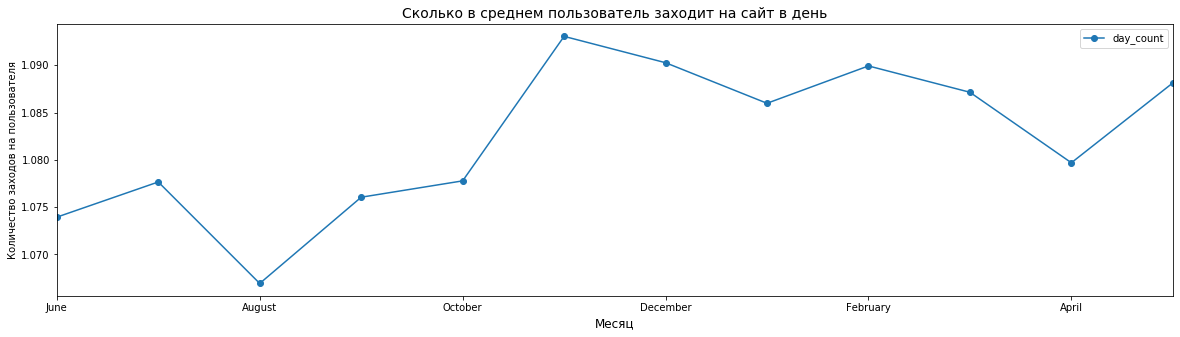

In [28]:
count_mean_day.groupby(['year','month','month_name']).agg({'day_count':'mean'}).sort_values(by = ['year','month'], ascending = True).reset_index().plot(style = '-o',x = 'month_name', y = 'day_count',figsize = (20,5))
plt.ylabel('Количество заходов на пользователя', fontsize=10)
plt.xlabel('Месяц', fontsize=12)
plt.title('Сколько в среднем пользователь заходит на сайт в день', fontsize = 14)
plt.show()

In [30]:
# Сколько раз в день уникальный пользователь заходит на сайт.
count_mean_day['day_count'].mean()

1.082169644003972

Рассчитаем, сколько пользователи проводят времени на сайте

In [31]:
visits_log['time_on_site'] =(visits_log['end_ts']-visits_log['start_ts']).dt.seconds/60

In [32]:
time_on_site = visits_log.loc[visits_log['time_on_site']>=0]

In [33]:
time_on_site['time_on_site'].describe()

count    359400.000000
mean         10.725108
std          16.938913
min           0.000000
25%           2.000000
50%           5.000000
75%          14.000000
max        1408.000000
Name: time_on_site, dtype: float64

In [34]:
time_on_site['time_on_site'].mean()

10.725108143201632

In [35]:
time_on_site['time_on_site'].median()

5.0

Вывод: Так как есть выбросы слишком больших значений, поэтому примим за среднее медиану. Среднее нахождение на сайте пользователей примерно 5 минут

Построим график нахождение на сайте по месяцам

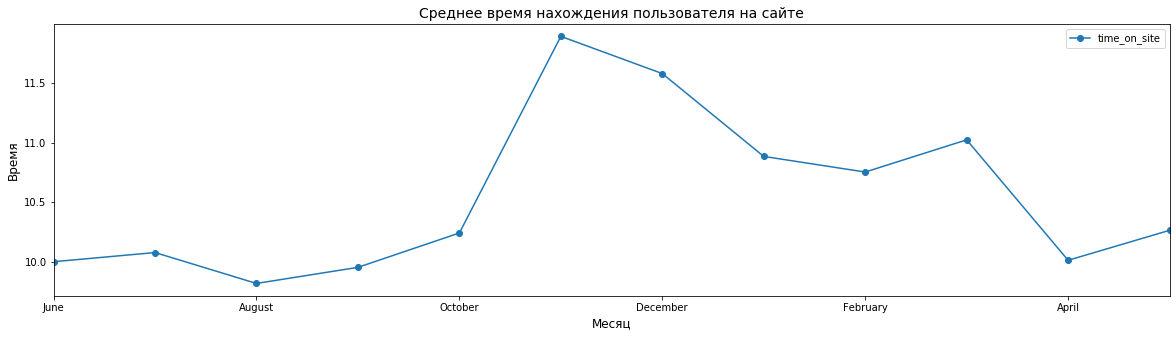

In [37]:
time_on_site.groupby(['year','month','month_name']).agg({'time_on_site':'mean'}).reset_index().sort_values(by=['year','month'], ascending=True).plot(style = '-o',x = 'month_name', y = 'time_on_site', figsize = (20,5))
plt.ylabel('Время', fontsize=12)
plt.xlabel('Месяц', fontsize=12)
plt.title('Среднее время нахождения пользователя на сайте', fontsize = 14)
plt.show()

In [41]:
# мода ряда time_on_site 
time_on_site['time_on_site'].mode()

0    1.0
dtype: float64

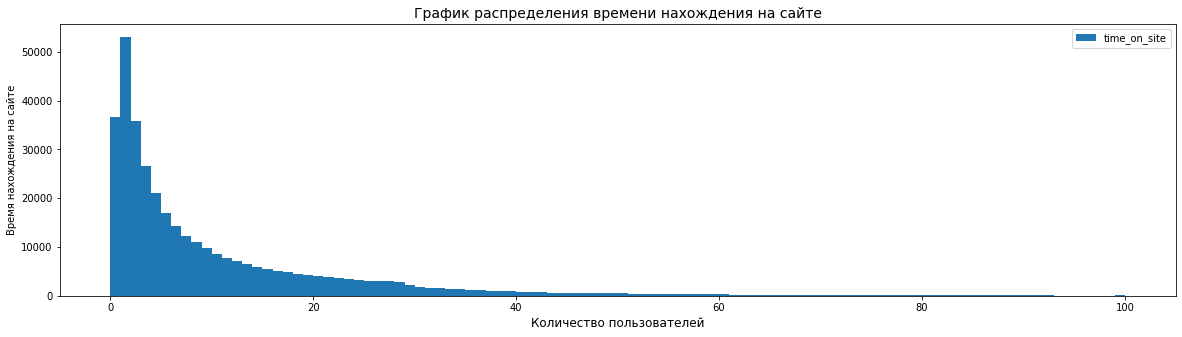

In [42]:
# График распределения времени нахождения на сайте
time_on_site.plot(kind = 'hist', y = 'time_on_site', bins=100, range = (0,100), figsize = (20,5))
plt.title('График распределения времени нахождения на сайте', fontsize = 14)
plt.ylabel('Время нахождения на сайте', fontsize=10)
plt.xlabel('Количество пользователей', fontsize=12)
plt.show()

Вывод: Во все месяцы пользователи в среднем проводят 5 минут, самым низким по посещаемости оказался месяц Август

Рассчитаем RR

In [43]:
first_visit = visits_log.groupby('uid')['start_ts'].min().reset_index()

In [44]:
first_visit.columns = ['uid','first_visit']

In [45]:
visits_log = visits_log.merge(first_visit)

In [46]:
visits_log['first_visit_month'] = visits_log['first_visit'].astype('datetime64[M]')
visits_log['visit_month'] = visits_log['start_ts'].astype('datetime64[M]')

In [47]:
visits_log['lifetime'] = (visits_log['visit_month'] - visits_log['first_visit_month']) / np.timedelta64(1, 'M')
visits_log['lifetime'] = visits_log['lifetime'].round().astype('int')

In [48]:
cohort_visits = visits_log.groupby(['first_visit_month', 'lifetime']).agg({'uid': 'nunique'}).reset_index()
f_uid = cohort_visits[cohort_visits['lifetime'] == 0][['first_visit_month', 'uid']]
f_uid.columns = ['first_visit_month', 'f_uid']

In [49]:
cohort_visits = cohort_visits.merge(f_uid)
cohort_visits['retention'] = cohort_visits['uid'] / cohort_visits['f_uid']
visits_retention_pivot = cohort_visits.pivot_table(index = 'first_visit_month', 
                                                   columns = 'lifetime', values = 'retention', aggfunc = 'sum')


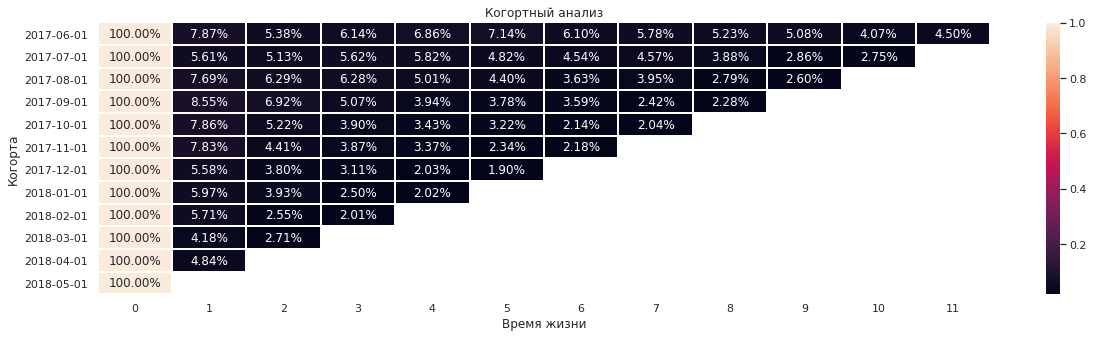

In [113]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (20, 5))
plt.title('Когортный анализ')
ax = sns.heatmap(visits_retention_pivot, annot=True, fmt='.2%', linewidths=1, linecolor='white')
ax.set_yticklabels(visits_retention_pivot.index.date)
plt.ylabel('Когорта', fontsize=12)
plt.xlabel('Время жизни', fontsize=12)
plt.show()

In [52]:
visits_retention_pivot[1].mean()*100

6.516659710392834

Вывод: Большая часть перестает посещать сайт после первого месяца. Стабильно на сайт возвращается на второй месяц порядка 6,5%

### Расчет метрик электронной коммерции

Сгруппируем данные покупок и найдем дату первой покупки каждого клиента

In [57]:
first_buy = orders_log.groupby('uid').agg({'buy_ts':'min'}).reset_index()

In [58]:
first_buy = first_buy.merge(first_visit) 

In [59]:
first_buy['time_buy'] = first_buy['buy_ts'] - first_buy['first_visit']

In [60]:
first_buy['time_buy'].median()

Timedelta('0 days 00:16:00')

Вывод: среднее время покупки после первого визита составляет 16 минут.

Найдем среднее количество покупок за 6 месяцев

In [61]:
count_buy_on_users = orders_log
count_buy_on_users['year'] = orders_log['buy_ts'].dt.year
count_buy_on_users['month'] = orders_log['buy_ts'].dt.month
count_buy_on_users['month_name'] = orders_log['buy_ts'].dt.month_name()
count_buy_on_users['year'] = count_buy_on_users['year'].astype('int')
count_buy_on_users['month'] = count_buy_on_users['month'].astype('int')

In [62]:
count_buy_on_users_query = count_buy_on_users.loc[(count_buy_on_users['year'] == 2017)&(count_buy_on_users['month']<=11)].groupby('uid').agg({'buy_ts':'count'}).reset_index()

In [63]:
count_buy_on_users_query['buy_ts'].mean()

1.3021816399068513

Вывод: если округлять по правилам в меньшую сторону, то среднее количество покупок на клиента за 6 месяцев с июня 2017 года составляет 1 покупка

Найдем количество покупок на клиента по когортам

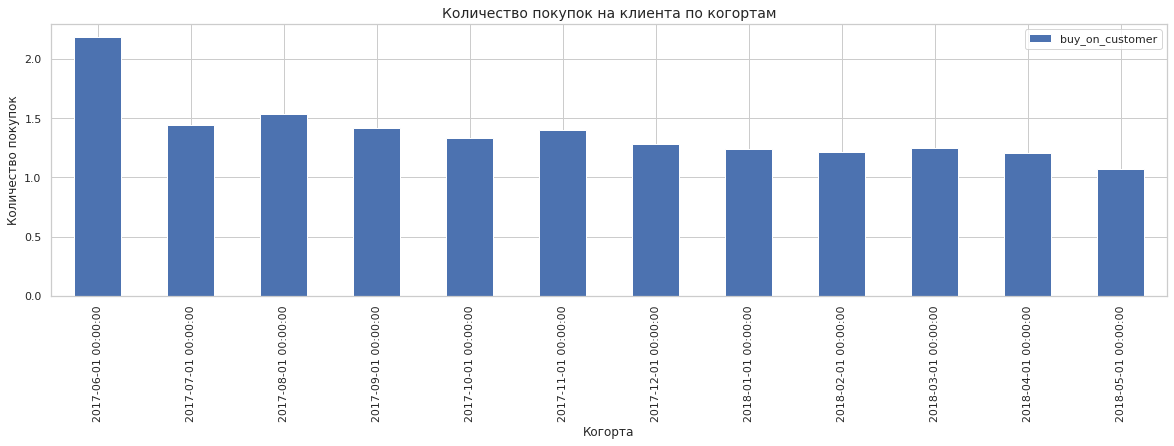

In [67]:
count_buy_on_users_coh = count_buy_on_users.merge(first_visit)
count_buy_on_users_coh['first_visit'] = count_buy_on_users_coh['first_visit'].astype('datetime64[M]')
buy_on_customer = count_buy_on_users_coh.groupby('first_visit').agg({'buy_ts':'count', 'uid':'nunique'}).reset_index()
buy_on_customer['buy_on_customer'] = buy_on_customer['buy_ts']/buy_on_customer['uid']
buy_on_customer.plot(kind = 'bar', x = 'first_visit', y = 'buy_on_customer', figsize = (20,5))
plt.title('Количество покупок на клиента по когортам', fontsize = 14)
plt.ylabel('Количество покупок', fontsize=12)
plt.xlabel('Когорта', fontsize=12)
plt.show()

Вывод: в первой когорте в среднем 2 покупки на 1 клиента, месяц первого визита на сайте июнь 2017 года. Если округлять 3 когорту (дата регистрации август 2017) в большу сторону, то значение покупок стремится к 2. В остальных когорта 1 покупка 1 клиент

In [65]:
# Найдем средний чек
orders_log['revenue'].mean()

4.999646930477041

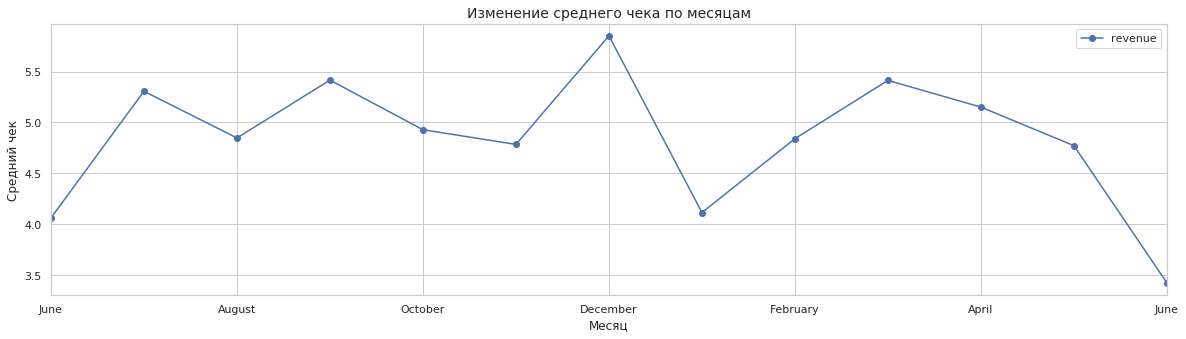

In [69]:
orders_log.groupby(['year','month','month_name']).agg({'revenue':'mean'}).reset_index().sort_values(by=['year','month'], ascending = True).plot(style = '-o',x = 'month_name',y = 'revenue',figsize = (20,5))
plt.title('Изменение среднего чека по месяцам', fontsize = 14)
plt.ylabel('Средний чек', fontsize=12)
plt.xlabel('Месяц', fontsize=12)
plt.show()

Вывод: на графике видно что максимальное значение среднего чека в декабре, данный месяц так же является самым активным для посещения. Можно сделать вывод, что к зимним праздникам клиенты активно закупаются

Расчет LTV

In [47]:
# Объединим визиты и уникальных клиентов по когортам
#ltv1_cohort_visits = visits_log.merge(f_uid)
#ltv_cohort_visits.head(5)

In [70]:
orders_log.head(5)

,buy_ts,revenue,uid,year,month,month_name
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017,6,June
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017,6,June
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017,6,June
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017,6,June
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017,6,June


In [71]:
#Преобразуем дату покупки в месяц для объединение таблиц
cohort_ltv = orders_log 
cohort_ltv['order_month'] = cohort_ltv['buy_ts'].astype('datetime64[M]')

In [72]:
#Найдем дату первой покупки
first_orders = cohort_ltv.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']

In [73]:
# Найдем уникальных пользвателей по месяцам
cohort_sizes = (
    first_orders.groupby('first_order_month')
    .agg({'uid': 'nunique'})
    .reset_index()
)
cohort_sizes.columns = ['first_order_month', 'n_buyers']

In [74]:
# Добавим в таблицу cohort_ltv когорты
orders_new = pd.merge(cohort_ltv,first_orders, on='uid')

In [75]:
# Посчитаем суммарный ltv по когортам
cohorts = (
    orders_new.groupby(['first_order_month', 'order_month'])
    .agg({'revenue': 'sum'})
    .reset_index()
)

In [76]:
# Добавим уникальных пользователей по месяцам
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')

In [77]:
# Посчитаем lifetime 
report['lifetime'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['lifetime'] = report['lifetime'].round().astype('int')
report.head(2)

,first_order_month,n_buyers,order_month,revenue,lifetime
0,2017-06-01,2023,2017-06-01,9557.49,0
1,2017-06-01,2023,2017-07-01,981.82,1


In [78]:
# Посчитаем ltv на клиента
report['ltv'] = report['revenue'] / report['n_buyers']

In [79]:
# Сделаем когортный анализ и найдем среднее значение ltv
output = report.pivot_table(
    index='first_order_month', columns='lifetime', values='ltv', aggfunc='mean'
).cumsum(axis=1)
output.fillna('')

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.724414,5.20974,5.64738,6.60205,7.62458,8.36008,9.31052,9.89212,10.4453,11.0511,11.6224,11.8792
2017-07-01,6.010218,6.34543,6.96896,7.32794,7.50473,7.66077,7.78098,7.9228,8.08404,8.23118,8.38685,
2017-08-01,5.276518,5.74851,6.20699,6.59827,7.09232,7.37586,7.58653,7.99153,8.28374,8.47172,,
2017-09-01,5.644529,6.76212,7.28305,11.2588,11.6594,12.3065,13.0081,13.2512,13.4352,,,
2017-10-01,5.003733,5.5395,5.73089,5.88803,6.03959,6.15996,6.24477,6.36024,,,,
2017-11-01,5.154683,5.55392,5.75347,6.07842,6.22644,6.28032,6.39524,,,,,
2017-12-01,4.738191,4.99856,5.92366,6.98894,7.30187,7.63991,,,,,,
2018-01-01,4.135636,4.43039,4.73468,4.87745,4.94015,,,,,,,
2018-02-01,4.156987,4.43526,4.51378,4.58792,,,,,,,,


In [80]:
# Сделаем срез по когортам, «прожившие» не менее 6 месяцев 
output =output.reset_index().loc[0:6,['first_order_month', 0, 1, 2, 3, 4, 5]]
output

lifetime,first_order_month,0,1,2,3,4,5
0,2017-06-01,4.724414,5.209743,5.647380,6.602051,7.624582,8.360084
1,2017-07-01,6.010218,6.345429,6.968960,7.327936,7.504727,7.660775
2,2017-08-01,5.276518,5.748511,6.206993,6.598270,7.092321,7.375861
3,2017-09-01,5.644529,6.762115,7.283045,11.258838,11.659396,12.306463
4,2017-10-01,5.003733,5.539495,5.730889,5.888035,6.039594,6.159956
5,2017-11-01,5.154683,5.553916,5.753472,6.078424,6.226437,6.280316
6,2017-12-01,4.738191,4.998565,5.923662,6.988937,7.301866,7.639913


In [81]:
# Посчитаем среднее ltv на клиента
output[5].mean().round()

8.0

Вывод: средний LTV на клиента за 6 месяцев составляет 8 у.е.

### Расчет маркетинговых метрик

Посчитаем общие расходы на маркетинг и найдем расходы на маркетинг по каналам продвижения

In [82]:
# Расходы по каналам продвижения
costs_group = costs
costs_group['dt']=costs_group['dt'].astype('datetime64[M]')
costs_group['year'] = costs_group['dt'].dt.year
costs_group['month'] = costs_group['dt'].dt.month
costs_group['month_name'] = costs_group['dt'].dt.month_name()
source_cac = costs_group.groupby('source_id').agg({'costs':'sum'}).sort_values(by='costs',ascending = False).reset_index()
source_cac

,source_id,costs
0,3,141321.63
1,4,61073.60
2,5,51757.10
3,2,42806.04
4,1,20833.27
5,10,5822.49
6,9,5517.49


In [83]:
# Общие расходы на продвижение
costs_group.groupby('source_id').agg({'costs':'sum'}).sort_values(by='costs',ascending = False).sum()

costs    329131.62
dtype: float64

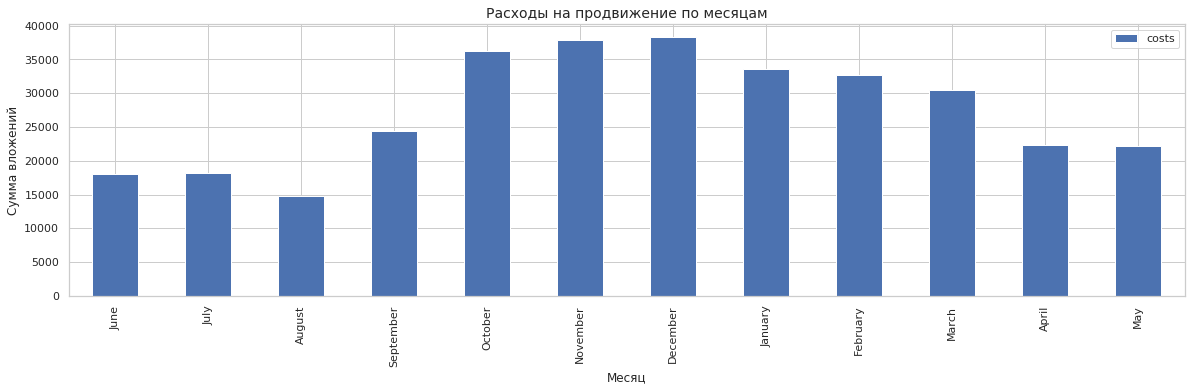

In [85]:
costs_group.groupby(['year','month','month_name']).agg({'costs':'sum'}).reset_index().sort_values(by=['year','month'], ascending=True).plot(kind = 'bar',x = 'month_name', y = 'costs', figsize = (20,5))
plt.title('Расходы на продвижение по месяцам', fontsize = 14)
plt.ylabel('Сумма вложений', fontsize=12)
plt.xlabel('Месяц', fontsize=12)
plt.show()

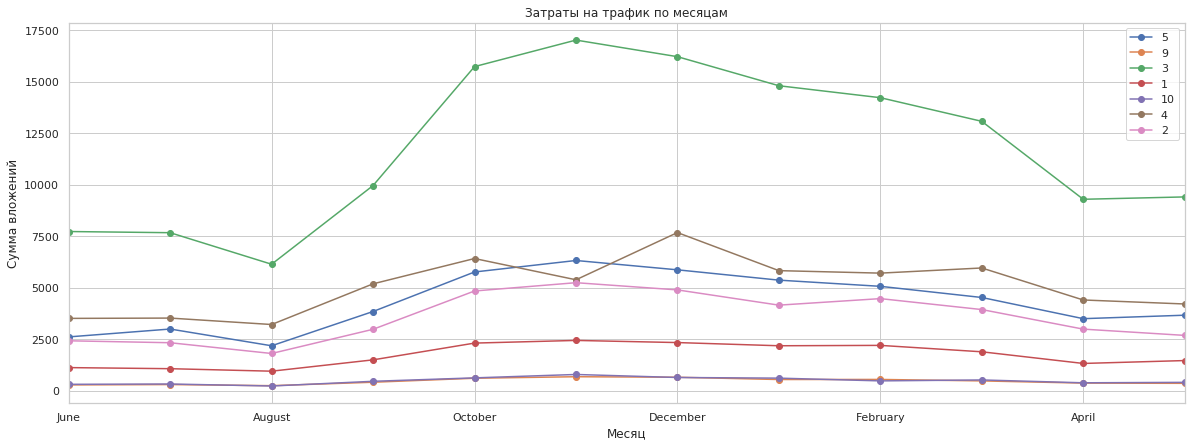

In [86]:
fig, ax = plt.subplots(figsize =(20,7))
source_plot = costs_group.groupby(['year','month','month_name','source_id']).agg({'costs':'sum'}).reset_index().sort_values(by = ['year','month'], ascending = True)
for row in costs_group['source_id'].value_counts().reset_index()['index']:
    source_plot.loc[source_plot['source_id']==row].plot(style = '-o', x = 'month_name', y='costs',legend = row,grid = True, title = 'Затраты на трафик по месяцам', ax=ax)
ax.legend(costs_group['source_id'].value_counts().reset_index()['index'],prop = {'size':11})
plt.ylabel('Сумма вложений', fontsize=12)
plt.xlabel('Месяц', fontsize=12)
plt.show()

Вывод: Почти 50% потратили на 1 источник. Самым затратыми месяцы с октября по декабрь включительно

Рассчитаем показатель CAC на клиента

In [87]:
# Общие расходы на продвижение
costs_group.groupby(['year','month','month_name','source_id']).agg({'costs':'sum'}).reset_index().sort_values(by = ['year','month'], ascending = True)

,year,month,month_name,source_id,costs
0,2017,6,June,1,1125.61
1,2017,6,June,2,2427.38
2,2017,6,June,3,7731.65
3,2017,6,June,4,3514.80
4,2017,6,June,5,2616.12
...,...,...,...,...,...
79,2018,5,May,3,9411.42
80,2018,5,May,4,4214.21
81,2018,5,May,5,3669.56
82,2018,5,May,9,362.17


Расчет среднего САС для всего проекта на 1 клиента

In [88]:
#Сгруппируем затраты по месяцам
costs_cac = costs_group.groupby(['dt']).agg({'costs':'sum'}).reset_index()
costs_cac.columns = ['first_order_month','costs']
costs_cac.head(5)

,first_order_month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88


In [89]:
#САС для всего проекта на 1 покупателя
costs_cac = costs_cac.merge(cohort_sizes)
costs_cac['cac'] = costs_cac['costs']/costs_cac['n_buyers']
costs_cac['cac'].mean().round()

9.0

In [90]:
# Найдем общее количество пользователей по каналам
source_count = visits_log.groupby(['source_id']).agg({'uid':'nunique'}).reset_index()
source_cac_full = source_cac.merge(source_count)
source_cac_full['cac'] = source_cac_full['costs']/source_cac_full['uid']
source_cac_full.sort_values(by = 'cac', ascending = False)
#source_cac['cac'] = source_cac['costs']/source_cac['count']

,source_id,costs,uid,cac
0,3,141321.63,74756,1.890439
3,2,42806.04,26245,1.631017
4,1,20833.27,18999,1.096546
2,5,51757.10,56974,0.908434
1,4,61073.60,83525,0.731201
5,10,5822.49,8067,0.721766
6,9,5517.49,9264,0.595584


In [91]:
# Найдем общее количество пользователей по каналам
source_count_1 = visits_log.groupby(['source_id']).agg({'uid':'nunique'}).reset_index()
source_count.head()

,source_id,uid
0,1,18999
1,2,26245
2,3,74756
3,4,83525
4,5,56974


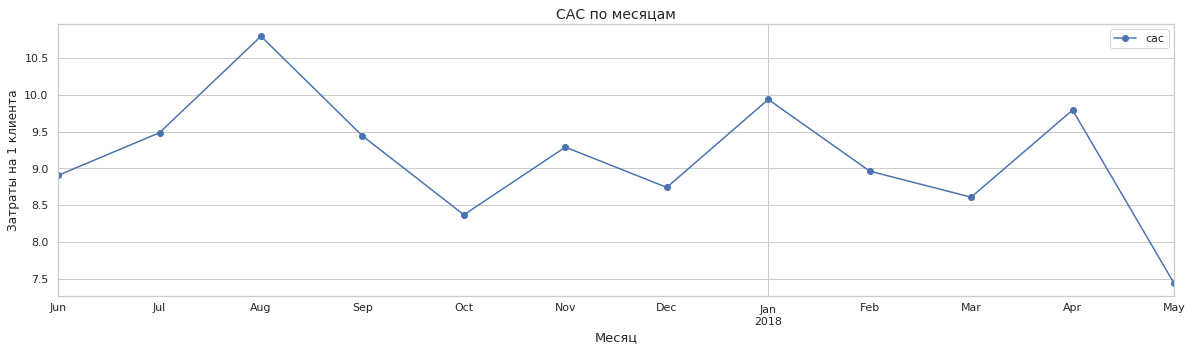

In [94]:
# CAC по месяцам
costs_cac.plot(style = '-o', x = 'first_order_month', y = 'cac', figsize = (20,5))
plt.title('CAC по месяцам', fontsize = 14)
plt.ylabel('Затраты на 1 клиента', fontsize=12)
plt.xlabel('Месяц', fontsize=13)
plt.show()

In [96]:
source_plot.head()

,year,month,month_name,source_id,costs
0,2017,6,June,1,1125.61
1,2017,6,June,2,2427.38
2,2017,6,June,3,7731.65
3,2017,6,June,4,3514.80
4,2017,6,June,5,2616.12


<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера. V.2.</b>

Отличный общий CAC! :) </div>

Посчитаем CAC по трафикам

In [97]:
# Первый источник каждого пользователя
uniq = visits_log.groupby(['first_visit_month','uid','source_id']).agg({'date':'min'}).reset_index()

In [98]:
# Первый источник каждого пользователя
uniq.columns = ['first_visit_month','uid','source_id','first_date']
uniq['first_date'] = uniq['first_date'].astype('datetime64[D]')
uniq.head()

,first_visit_month,uid,source_id,first_date
0,2017-06-01,297729379853735,3,2017-06-07
1,2017-06-01,407573351275847,2,2017-06-17
2,2017-06-01,1349311730029478,5,2017-06-28
3,2017-06-01,1575281904278712,10,2017-06-03
4,2017-06-01,2471247936243530,2,2017-07-10


In [99]:
# Посчитаем дату первой покупки
orders_first = orders_log.groupby(['order_month','uid']).agg({'buy_ts':'min'}).reset_index()

In [100]:
# Посчитаем количество уникальных пользователей по месяцам и трафикам
orders_first.columns = ['first_visit_month','uid','first_date']
orders_first['first_date'] = orders_first['first_date'].astype('datetime64[D]')
orders_first.head()

,first_visit_month,uid,first_date
0,2017-06-01,1575281904278712,2017-06-03
1,2017-06-01,16233238570251706,2017-06-06
2,2017-06-01,29085576454138824,2017-06-08
3,2017-06-01,31782048561502182,2017-06-03
4,2017-06-01,50884319066603964,2017-06-08


In [101]:
# Посчитаем количество уникальных пользователей по месяцам и трафикам
source = uniq.merge(orders_first)
source = source.groupby(['first_date','source_id']).agg({'uid':'count'}).reset_index()
source.columns = ['dt','source_id','uid']
source.head(2)

,dt,source_id,uid
0,2017-06-01,1,17
1,2017-06-01,2,16


In [102]:
### Затраты по месяцам и трафикам
#costs_month_source = costs_group.groupby(['source_id','dt','year','month','month_name']).agg({'costs':'sum'}).reset_index()
#costs_month_source.head(2)
costs_1 = costs
costs_1['dt'] = costs_1['dt'].astype('datetime64[D]')
costs_cac = pd.merge(costs_1, source, left_on=['source_id','dt'], right_on = ['source_id','dt'])
costs_cac.head(5)

,source_id,dt,costs,year,month,month_name,uid
0,1,2017-06-01,75.20,2017,6,June,17
1,1,2017-06-01,62.25,2017,6,June,17
2,1,2017-06-01,36.53,2017,6,June,17
3,1,2017-06-01,55.00,2017,6,June,17
4,1,2017-06-01,57.08,2017,6,June,17


In [103]:
# Посчитаем CAC по месяцам и трафикам
costs_cac['cac'] = costs_cac['costs']/costs_cac['uid']
costs_cac['month'] = costs_cac['dt'].astype('datetime64[M]')
costs_cac_group = costs_cac.groupby(['month','source_id']).agg({'cac':'mean'}).reset_index()
costs_cac.head(5)

,source_id,dt,costs,year,month,month_name,uid,cac
0,1,2017-06-01,75.20,2017,2017-06-01,June,17,4.423529
1,1,2017-06-01,62.25,2017,2017-06-01,June,17,3.661765
2,1,2017-06-01,36.53,2017,2017-06-01,June,17,2.148824
3,1,2017-06-01,55.00,2017,2017-06-01,June,17,3.235294
4,1,2017-06-01,57.08,2017,2017-06-01,June,17,3.357647


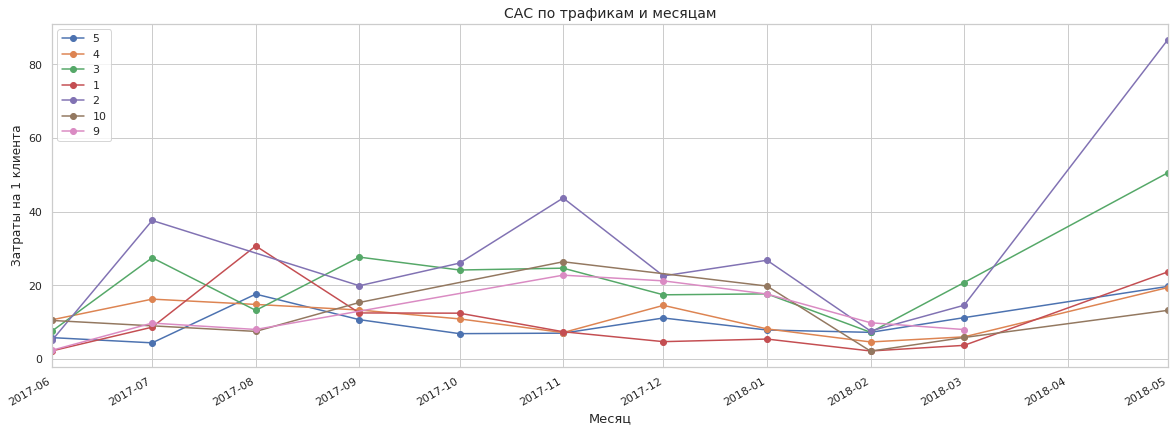

In [105]:
# Поcтроим график CAC по месяцам и трафикам
fig, ax = plt.subplots(figsize =(20,7))
for row in costs_cac_group['source_id'].value_counts().reset_index()['index']:
    costs_cac_group.loc[costs_cac_group['source_id']==row].plot(style = '-o', x = 'month', y='cac',legend = row,grid = True,  ax=ax)
ax.legend(costs_cac_group['source_id'].value_counts().reset_index()['index'],prop = {'size':11})
plt.title('CAC по трафикам и месяцам', fontsize = 14)
plt.ylabel('Затраты на 1 клиента', fontsize=12)
plt.xlabel('Месяц', fontsize=13)
plt.show()

Рассчитаем ROMI по каналам

In [106]:
#romi['first_visit_month_x'] = romi['first_visit_month_x'].astype('datetime64[M]')
orders_first.head(5)

,first_visit_month,uid,first_date
0,2017-06-01,1575281904278712,2017-06-03
1,2017-06-01,16233238570251706,2017-06-06
2,2017-06-01,29085576454138824,2017-06-08
3,2017-06-01,31782048561502182,2017-06-03
4,2017-06-01,50884319066603964,2017-06-08


In [107]:
#romi['first_visit_month_x'] = romi['first_visit_month_x'].astype('datetime64[M]')
uniq.head(5)
uniq_1 = uniq
uniq_1['first_date'] = uniq_1['first_date'].astype('datetime64[M]')
uniq_1.columns = ['first_visit_month','uid','source_id','month_buy']
uniq_1.head(5)

,first_visit_month,uid,source_id,month_buy
0,2017-06-01,297729379853735,3,2017-06-01
1,2017-06-01,407573351275847,2,2017-06-01
2,2017-06-01,1349311730029478,5,2017-06-01
3,2017-06-01,1575281904278712,10,2017-06-01
4,2017-06-01,2471247936243530,2,2017-07-01


In [108]:
#romi['first_visit_month_x'] = romi['first_visit_month_x'].astype('datetime64[M]')
orders_log_group = orders_log
orders_log_group['buy_ts'] = orders_log_group['buy_ts'].astype('datetime64[D]')
orders_log_group['month_buy'] = orders_log_group['buy_ts'].astype('datetime64[M]')
orders_log_group = orders_log_group.groupby(['month_buy','uid']).agg({'revenue':'sum'}).reset_index()
orders_log_group.columns = ['month_buy','uid','revenue']
orders_log_group.head(5)

,month_buy,uid,revenue
0,2017-06-01,1575281904278712,3.05
1,2017-06-01,16233238570251706,1.65
2,2017-06-01,29085576454138824,3.36
3,2017-06-01,31782048561502182,6.11
4,2017-06-01,50884319066603964,0.98


In [109]:
#romi['first_visit_month_x'] = romi['first_visit_month_x'].astype('datetime64[M]')
data_1 = pd.merge(orders_log_group,uniq_1,left_on=['month_buy','uid'], right_on = ['month_buy','uid'] )
data_1.head(5)
data_1_rev = data_1.groupby(['first_visit_month','month_buy','source_id']).agg({'revenue':'sum'}).reset_index()
data_1_uid = data_1.groupby(['first_visit_month','month_buy','source_id']).agg({'uid':'nunique'}).reset_index()
data_1_ltv = pd.merge(data_1_rev,data_1_uid, left_on = ['first_visit_month','month_buy','source_id'],right_on = ['first_visit_month','month_buy','source_id'])
data_1_ltv['age'] = (data_1_ltv['month_buy']-data_1_ltv['first_visit_month'])/ np.timedelta64(1, 'M')
data_1_ltv['age'] = data_1_ltv['age'].round().astype('int')
data_1_ltv['ltv'] = data_1_ltv['revenue']/data_1_ltv['uid']
data_1_ltv.head(5)

,first_visit_month,month_buy,source_id,revenue,uid,age,ltv
0,2017-06-01,2017-06-01,1,2127.53,326,0,6.526166
1,2017-06-01,2017-06-01,2,2379.43,342,0,6.957398
2,2017-06-01,2017-06-01,3,3098.96,703,0,4.408193
3,2017-06-01,2017-06-01,4,2958.78,481,0,6.151310
4,2017-06-01,2017-06-01,5,2420.70,451,0,5.367406


In [110]:
costs_1['costs_month'] =costs_1['dt'].astype('datetime64[M]')

In [111]:
#costs_1['month_buy'] = costs_1['dt'].astype('datetime64[M]')
costs_1 = costs_1.groupby(['costs_month','source_id']).agg({'costs':'sum'}).reset_index()
costs_1.head(5)

,costs_month,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12


In [112]:
romi = pd.merge(data_1_ltv,costs_1, left_on = ['month_buy','source_id'], right_on = ['costs_month','source_id']) 
#romi['cac'] = romi['costs']/costs['uid']
romi['cac'] = romi['costs']/romi['uid']
romi['romi'] = romi['ltv']/romi['cac']
romi.head(5)

,first_visit_month,month_buy,source_id,revenue,uid,age,ltv,costs_month,costs,cac,romi
0,2017-06-01,2017-06-01,1,2127.53,326,0,6.526166,2017-06-01,1125.61,3.452791,1.890113
1,2017-06-01,2017-06-01,2,2379.43,342,0,6.957398,2017-06-01,2427.38,7.097602,0.980246
2,2017-06-01,2017-06-01,3,3098.96,703,0,4.408193,2017-06-01,7731.65,10.998080,0.400815
3,2017-06-01,2017-06-01,4,2958.78,481,0,6.151310,2017-06-01,3514.80,7.307277,0.841806
4,2017-06-01,2017-06-01,5,2420.70,451,0,5.367406,2017-06-01,2616.12,5.800710,0.925302


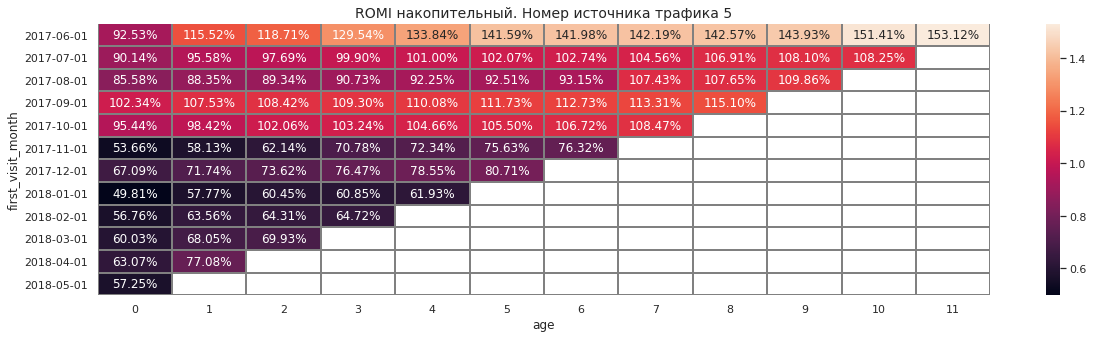

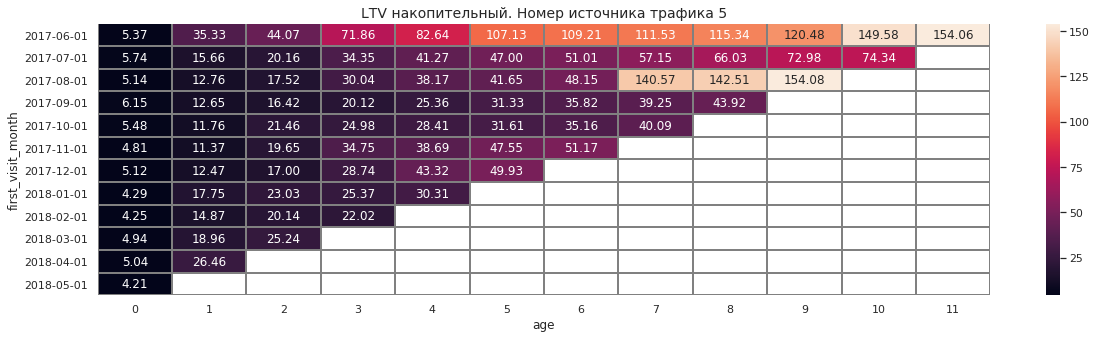

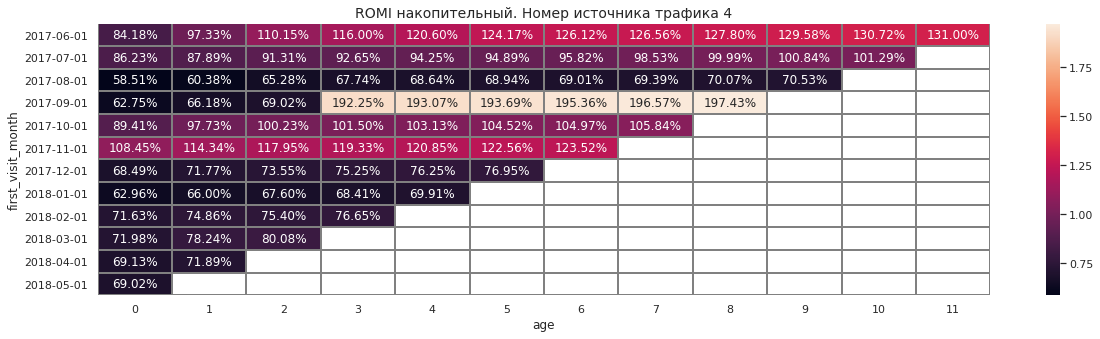

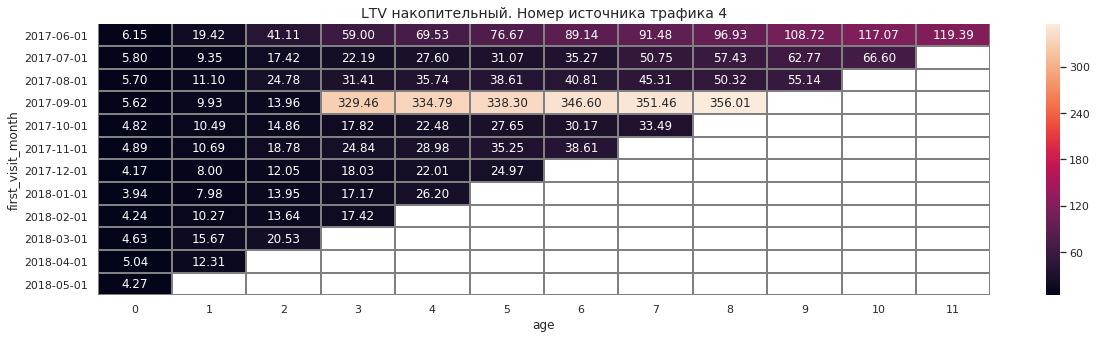

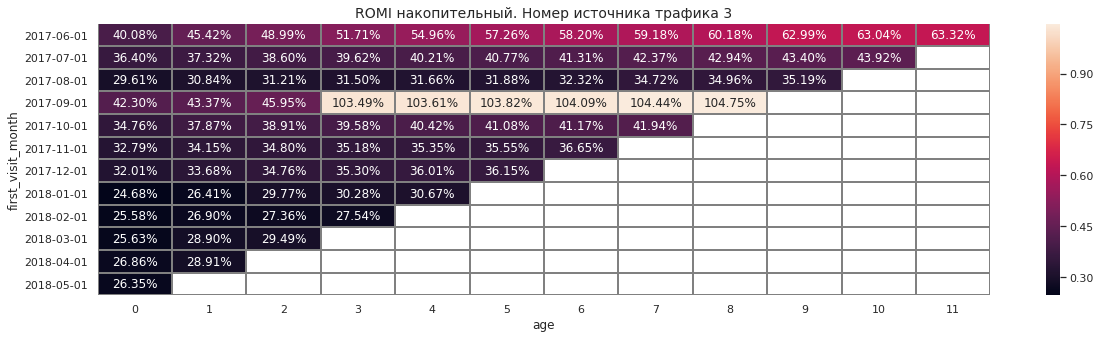

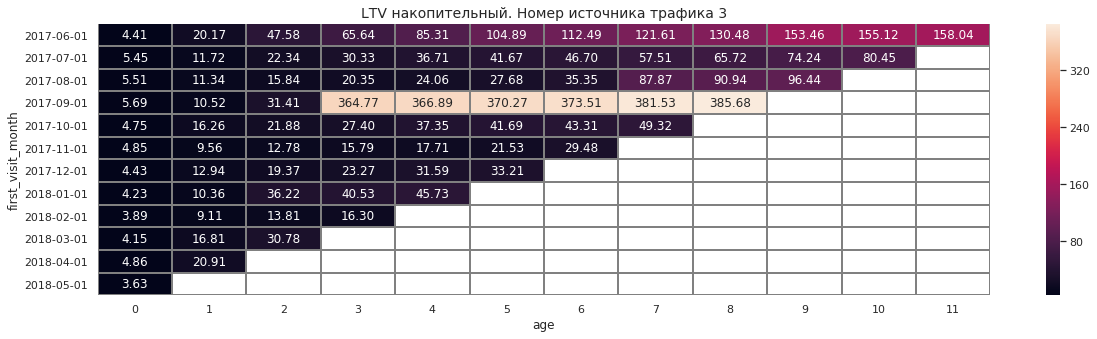

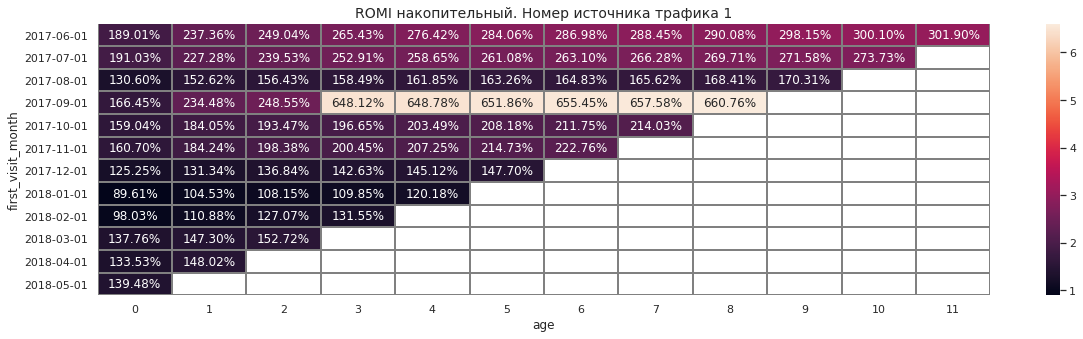

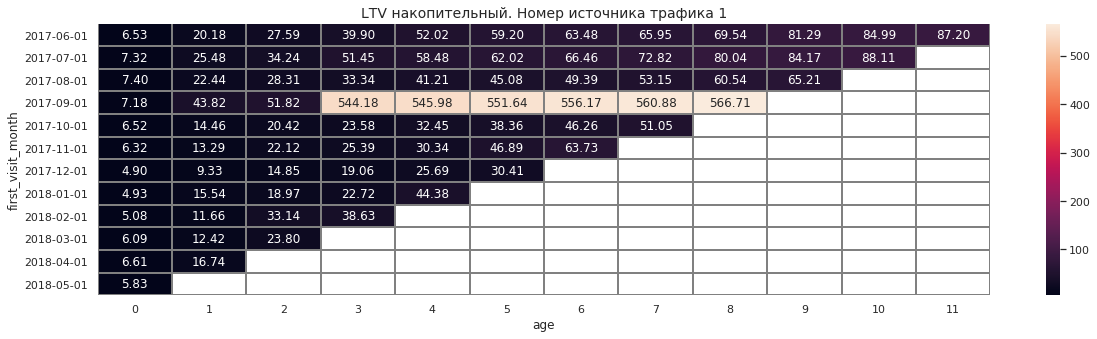

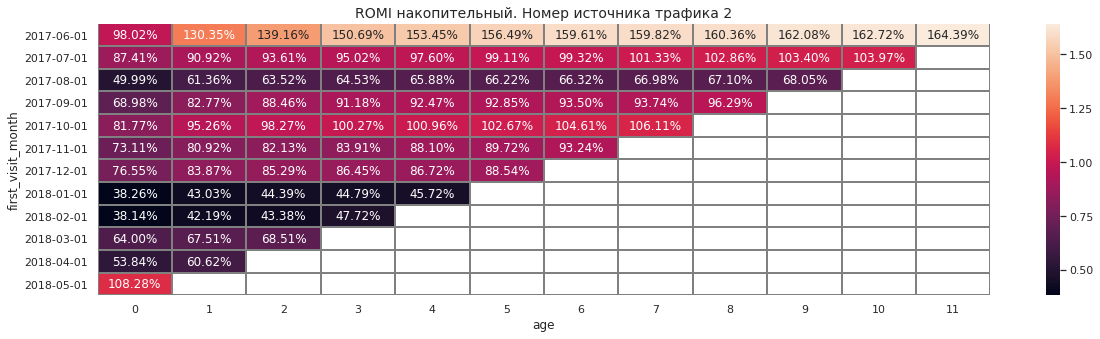

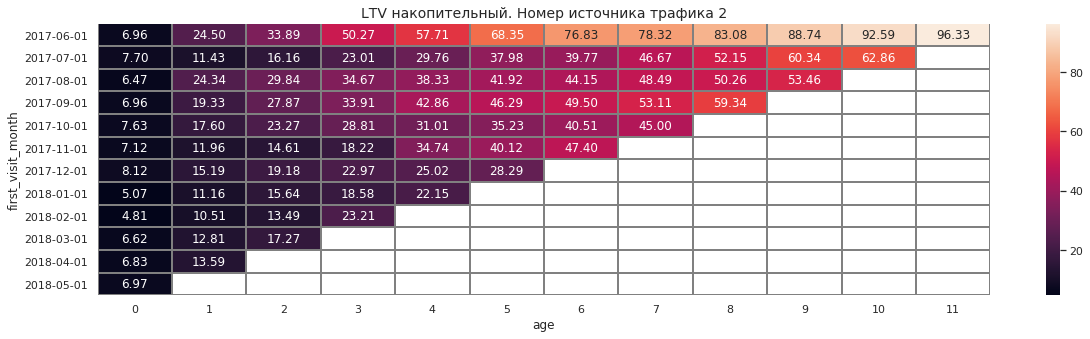

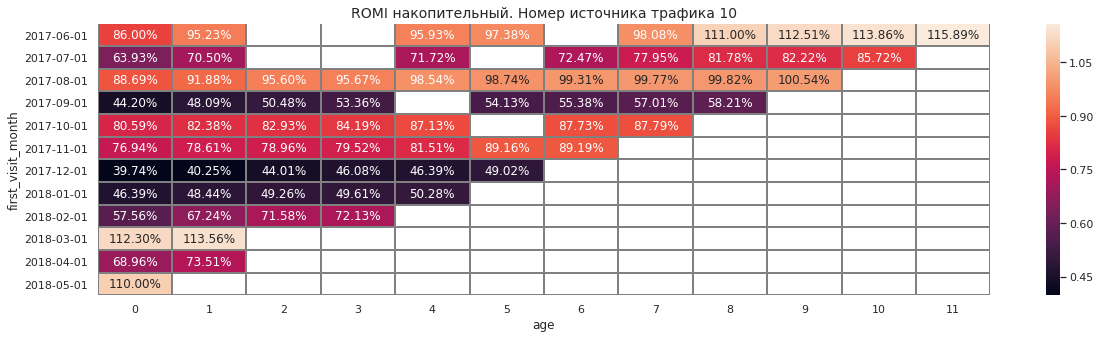

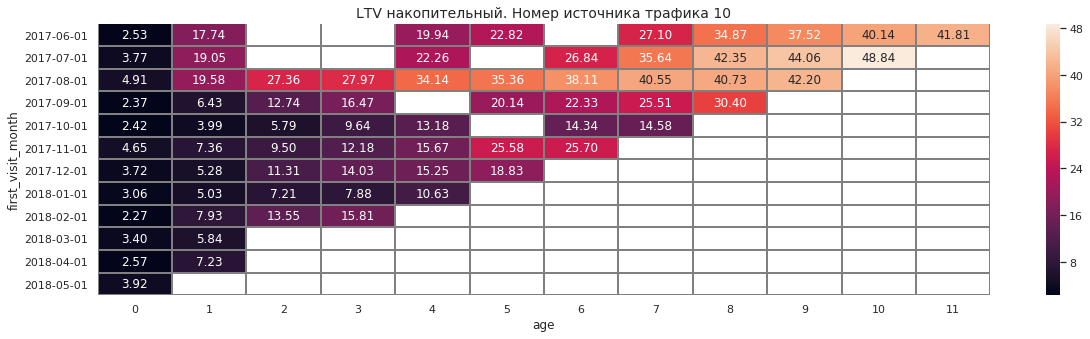

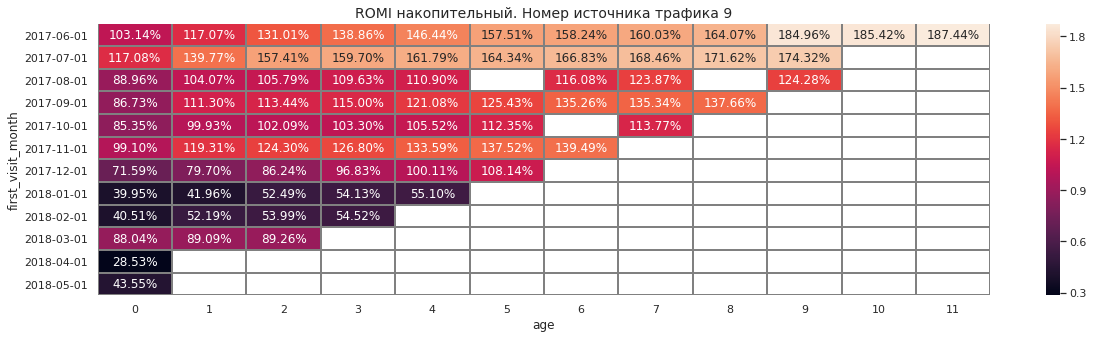

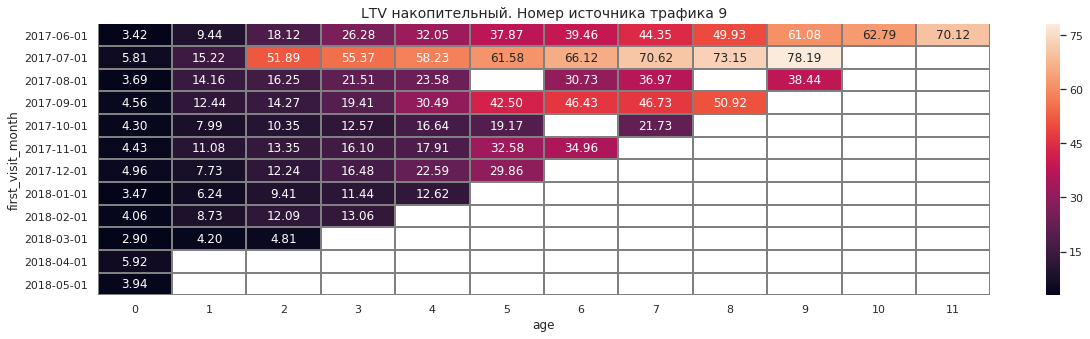

In [115]:
for row in costs_cac_group['source_id'].value_counts().reset_index()['index']:
    output_romi = romi.loc[romi['source_id']== row].pivot_table(
    index='first_visit_month', columns='age', values='romi', aggfunc='mean'
).cumsum(axis = 1)
    output_ltv = romi.loc[romi['source_id']== row].pivot_table(
    index='first_visit_month', columns='age', values='ltv', aggfunc='mean'
).cumsum(axis = 1)
    plt.figure(figsize=(20, 5))
    plt.title('ROMI накопительный. Номер источника трафика {}'.format(row),fontsize=14)
    ax = sns.heatmap(output_romi, annot=True, fmt='.2%', linewidths=1, linecolor='gray')
    ax.set_yticklabels(output_romi.index.date)
    plt.figure(figsize=(20, 5))
    plt.title('LTV накопительный. Номер источника трафика {}'.format(row),fontsize=14)
    ax = sns.heatmap(output_ltv, annot=True, fmt='.2f', linewidths=1, linecolor='gray')
    ax.set_yticklabels(output_ltv.index.date)

Рекомендации по привлечению новых клиентов на сайт:
1. Наибольшая активность на сайте проявляется в будние дни и снижается в выходным
2. Самые активные недели каждого месяца со 2 по 4
3. Рост активности пользователей начинается с осенних месяцев. Пик активности пользователей приходится на декабрь и далее идет на плавное снижение. Минимальная активность замечена в августе.
4. Показатели времени нахождения на сайте и среднего чека ведут себя так же, как и активность пользователей на сайте. Увеличивается в зимний период и снижается к лету
5. Аудитория на сайте обновляется быстро, так как процент возврата на сайт составляет 6.5%, а среднее количество покупок 1 на 1 пользователя. Это говорит о том, что без активного продвижения и вложений в рекламную кампанию продажи будут резко снижаться
В какие рекламные каналы вкладываться и на каких пользователей обратить внимание
1. Наиболее интересные когорты с точки зрения окупаемость инвестици в рекламу являются когорты с июля по декабрь.
Когорты по трафикам, на которые необходимо активно запускать рекламный трафик
5 трафик: 1 и 3 когорты
9 трафик все когорты до конца 2017 включительно
4 трафик 1, 4, 5 и 6 когорты
3 трафик 4 когорта
2 трафик 1 и 12 когорты
1 трафик
2. Для привлечения клиентов не стоит использовать 3 трафик. Он оказался самым затратым с точки зрения вложений и за рассматриваемый период не окупился.
3. С точки зрения окупаемости (romi) и ltv стоит рассмотреть для продвижения трафики : 1, 2, 5 как наиболее перспективные. С дрегими так же стоит работать, но делать на них меньший акцент.